# Wykorzystanie biblioteki DEAP w problemie optymalizacji parametrów klasyfikatorów oraz selekcji cech

### I Optymalizacja parametrów klasyfikatorów

In [1]:
# loading data
import pandas as pd
import numpy as np
%store -r train_x
%store -r train_y
%store -r test_x
%store -r test_y

In [2]:
test_y = pd.DataFrame(np.array(test_y), columns=['Satisfaction'])['Satisfaction']
train_y = pd.DataFrame(np.array(train_y), columns=['Satisfaction'])['Satisfaction']

In [3]:
train_x.reset_index(inplace=True)
test_x.reset_index(inplace=True)

In [4]:
train_x.drop(['index'], axis=1, inplace=True)
test_x.drop(['index'], axis=1, inplace=True)

In [5]:
test_x.head()

,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Male,Female
0,0.472335,0.848788,0.667217,-1.071681,-1.037182,1.71065,0.618515,0.173020,0.737944,-0.155107,...,1.249142,1.252571,1.160189,-1.430735,1.148858,1.297846,1.022685,0.839869,-0.981277,0.981322
1,0.472335,2.513040,0.667217,1.010115,2.809460,1.71065,1.274785,1.602534,1.558726,-0.155107,...,1.249142,1.252571,1.160189,0.404238,1.148858,-0.262956,-0.374402,-0.380357,-0.981277,0.981322
2,0.472335,-0.416043,0.667217,1.010115,-0.871335,-0.55031,1.274785,1.602534,1.558726,-1.662672,...,-1.127197,-1.030593,-1.386638,-0.513249,-1.452699,0.517445,0.128549,-0.186230,-0.981277,0.981322
3,0.472335,0.848788,0.667217,1.010115,-0.268256,-0.55031,-0.694024,-0.541737,-0.903620,1.352458,...,0.457029,0.491517,0.311247,-0.513249,0.281672,1.297846,-0.094985,-0.380357,-0.981277,0.981322
4,0.472335,0.848788,-1.498750,-0.030783,-0.117486,1.71065,0.618515,1.602534,-0.082838,0.598676,...,-0.335084,1.252571,1.160189,0.404238,1.148858,0.517445,-0.374402,-0.380357,1.019072,-1.019025


In [6]:
train_x

,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Male,Female
0,0.472335,1.581059,0.667217,-0.030783,-0.454205,-1.303963,-0.037754,-0.541737,-0.082838,-0.908889,...,-1.919310,-1.791647,-2.235580,-0.880243,-2.319884,-1.823757,-0.011159,-0.103033,-0.981277,0.981322
1,0.472335,1.514489,0.667217,1.010115,2.749152,-0.550310,-0.037754,0.173020,-0.082838,0.598676,...,-1.127197,-1.030593,-1.386638,0.587735,-1.452699,-0.262956,-0.122926,-0.380357,-0.981277,0.981322
2,0.472335,1.381349,0.667217,-0.030783,-0.865305,0.956997,1.274785,1.602534,1.558726,0.598676,...,0.457029,0.491517,0.311247,1.321725,0.281672,-0.262956,0.631501,0.118826,-0.981277,0.981322
3,0.472335,0.345245,0.667217,1.010115,0.310301,0.203344,-0.037754,0.173020,0.245475,-0.908889,...,0.615451,1.252571,0.311247,0.587735,0.455109,0.049205,-0.374402,-0.380357,-0.981277,0.981322
4,-2.117124,-0.149763,0.667217,1.010115,-0.862289,-0.550310,-0.694024,-0.541737,-0.411151,-0.908889,...,-0.335084,1.252571,1.160189,-0.146254,0.281672,-1.043356,0.407967,0.202024,-0.981277,0.981322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,-2.117124,-0.815464,0.667217,-1.071681,-0.789920,-0.550310,-0.037754,-0.541737,-0.082838,0.598676,...,-0.335084,0.491517,0.311247,-0.513249,0.281672,0.517445,-0.374402,-0.380357,-0.981277,0.981322
103900,-2.117124,-1.015174,0.667217,-1.071681,-0.824094,0.203344,-0.037754,0.173020,-0.411151,-0.155107,...,-1.919310,0.491517,1.160189,0.587735,-0.585513,-0.262956,-0.374402,-0.380357,1.019072,-1.019025
103901,0.472335,-1.148314,0.667217,-1.071681,-0.507477,-0.550310,-0.037754,0.173020,-0.082838,-0.908889,...,-1.919310,-0.269538,-0.537696,0.404238,-1.452699,-1.043356,1.693287,1.782772,1.019072,-1.019025
103902,0.472335,-0.482613,0.667217,-1.071681,-1.050249,-2.057616,-2.006563,-1.971252,0.737944,0.598676,...,-1.919310,-1.030593,-2.235580,1.321725,1.148858,0.517445,-0.374402,-0.380357,-0.981277,0.981322


In [7]:
train_y

0         0
1         0
2         1
3         1
4         0
         ..
103899    0
103900    0
103901    0
103902    1
103903    0
Name: Satisfaction, Length: 103904, dtype: int64

In [8]:
# Preprocessing
y=train_y
df=train_x
numberOfAtributtes= len(df.columns)
print(numberOfAtributtes)

23


In [9]:
# Classification using SVC with default parameters and 5x K-fold cross validation for all 45 features
from sklearn import model_selection
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier

mms = MinMaxScaler()
df_norm = mms.fit_transform(df)

clf = RandomForestClassifier()
scores = model_selection.cross_val_score(clf, df_norm, y, cv=5, scoring='accuracy', n_jobs=-1)
print(scores.mean())

0.9594337089494507


In [10]:
# Generationg new individual
import random
def parametersRFC(numberFeatures,icls):
    genome = list()
    
    # n_estimators
    n_estimators = random.randint(20, 200)
    genome.append(n_estimators)
    
    # criterion
    criterion = ['gini', 'entropy']
    genome.append(criterion[random.randint(0, 1)])
    
    # max_depth
    max_depth = None
    if random.uniform(0,1) > 0.5: max_deph = random.randint(1, 20)
    genome.append(max_depth)
    
    # min_samples_split
    min_samples_split = 2
    if random.uniform(0,1) > 0.5: min_samples_split = random.randint(3, 10)
    genome.append(min_samples_split)
    
    # min_samples_leaf
    min_samples_leaf = 2
    if random.uniform(0,1) > 0.5: min_samples_leaf = random.randint(2, 10)
    genome.append(min_samples_leaf)
    
    # min_weight_fraction_leaf
    min_weight_fraction_leaf = 0.0
    if random.uniform(0,1) > 0.5: min_weight_fraction_leaf = random.uniform(0.0, 0.5)
    genome.append(min_weight_fraction_leaf)
    
    # max_features
    max_features = ['auto', 'sqrt', 'log2']
    genome.append(max_features[random.randint(0, 2)])

    return icls(genome)

In [11]:
# Mutation
def mutationRFC(individual):
    numberParamer= random.randint(0,len(individual)-1)
    if numberParamer==0:
        # n_estimators
        n_estimators = random.randint(20, 200)
        individual[numberParamer]=n_estimators
    elif numberParamer==1:    
        # criterion
        criterion = ['gini', 'entropy']
        individual[numberParamer]=criterion[random.randint(0, 1)]
    elif numberParamer==2: 
        # max_depth
        max_depth = None
        if random.uniform(0,1) > 0.2: max_deph = random.randint(1, 20)
        individual[numberParamer]=max_depth
    elif numberParamer==3: 
        # min_samples_split
        min_samples_split = 2
        if random.uniform(0,1) > 0.2: min_samples_split = random.randint(3, 10)
        individual[numberParamer]=min_samples_split
    elif numberParamer==4: 
        # min_samples_leaf
        min_samples_leaf = 2
        if random.uniform(0,1) > 0.2: min_samples_leaf = random.randint(2, 10)
        individual[numberParamer]=min_samples_leaf
    elif numberParamer==5: 
        # min_weight_fraction_leaf
        min_weight_fraction_leaf = 0.0
        if random.uniform(0,1) > 0.2: min_weight_fraction_leaf = random.uniform(0.0, 0.5)
        individual[numberParamer]=min_weight_fraction_leaf
    elif numberParamer==6: 
        # max_features
        max_features = ['auto', 'sqrt', 'log2']
        individual[numberParamer]=max_features[random.randint(0, 2)]

In [12]:
# Fitness function
import math
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

def parametersFitnessRFC(y,df,numberOfAtributtes,individual):
    split=5
    cv = StratifiedKFold(n_splits=split)
    mms = MinMaxScaler()
    df_norm = mms.fit_transform(df)

    estimator = RandomForestClassifier(n_estimators=individual[0], criterion=individual[1], 
                                       max_depth=individual[2],min_samples_split=individual[3], 
                                       min_samples_leaf=individual[4], min_weight_fraction_leaf=individual[5], 
                                       max_features=individual[6], n_jobs=-1)
    resultSum = 0
    for train, test in cv.split(df_norm, y):
        estimator.fit(df_norm[train], y[train])
        predicted = estimator.predict(df_norm[test])
        expected = y[test]
        tn, fp, fn, tp = metrics.confusion_matrix(expected, predicted).ravel()
        result = (tp + tn) / (tp + fp + tn + fn) #w oparciu o macierze pomyłek https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/
        resultSum = resultSum + result #zbieramy wyniki z poszczególnych etapów walidacji krzyżowej

    return resultSum / split,

In [13]:
from deap import base, creator, tools
import random
from math import sin
import matplotlib.pyplot as plt
from timeit import default_timer as timer

In [14]:
sizePopulation = 20
probabilityMutation = 0.2
probabilityCrossover = 0.8
numberIteration = 10
numberElitism = 1

In [15]:
def configureDeap(fitness, parameters, mutation,
                  selection_param={'function':tools.selTournament, 'tournsize':3},
                 mate_params={'function':tools.cxTwoPoint},):
    
    creator.create('FitnessMax', base.Fitness, weights=(1.0,))
    creator.create("Individual", list, fitness=creator.FitnessMax)

    toolbox = base.Toolbox() 
    toolbox.register('individual', parameters, numberOfAtributtes, creator.Individual)
    toolbox.register('evaluate', fitness,y,df,numberOfAtributtes)
    toolbox.register('population', tools.initRepeat, list, toolbox.individual)
    toolbox.register('select', **selection_param)
    toolbox.register('mate', **mate_params)
    toolbox.register('mutate', mutation)

    return toolbox

In [16]:
def mutate(toolbox, offspring):
    for mutant in offspring:
        # mutation
        if random.random() < probabilityMutation:
            toolbox.mutate(mutant)
            del mutant.fitness.values
    return offspring

In [17]:
def setIndividualFitnessValue(individuals, fitnesses):
    for ind, fit in zip(individuals, fitnesses):
        ind.fitness.value = [fit]
    return individuals

In [18]:
def initPopulation(toolbox):
    print('create population')
    population = toolbox.population(n=sizePopulation)
    print('calc fitnesses')
    fitnesses = list(map(toolbox.evaluate, population))
    print('set individuals fitnesses')
    population = setIndividualFitnessValue(population, fitnesses)
    return population

In [19]:
def crossover(toolbox, offspring):
    # [::2] - gets only individuals with odd indexes
    # [1::2] -  gets only individuals with even indexes
    for child1, child2 in zip(offspring[::2], offspring[1::2]):
        # crossover
        if random.random() < probabilityCrossover:
            toolbox.mate(child1, child2)
            del child1.fitness.values
            del child2.fitness.values
    return offspring

In [20]:
def evaluate(toolbox, offspring, verbose=0):
    # evaluate new individuals
    print('calc fitnesses')
    new_individuals = [ind for ind in offspring if not ind.fitness.valid]
    new_fitnesses = map(toolbox.evaluate, new_individuals)
    for ind, fit in zip(new_individuals, new_fitnesses):
        ind.fitness.values = fit
    
    if verbose>3:
        print('Ewaluated %i individuals'%len(new_individuals))
    return offspring

In [21]:
def getBestsForElitism(population):
    listElitism = []
    for x in range(0, numberElitism):
        listElitism.append(tools.selBest(population, 1)[0])
    return listElitism

In [22]:
def calculateStatistics(population,verbose=0):
    fits = [ind.fitness.values[0] for ind in population]
    length = len(population)
    mean = sum(fits)/length
    sum2 = sum(x*x for x in fits)
    std = abs(sum2/length-mean **2)**0.5
    if verbose>2:
        print("  Min %s" % min(fits))
        print("  Max %s" % max(fits))
        print("  Avg %s" % mean)
        print("  Std %s" % std)
    return (mean, std)

In [23]:
def pickBestIndividual(population, verbose=0):
    best_ind = tools.selBest(population, 1)[0]
    if verbose>1:
        print("Best individual is %s, %s" % (best_ind, best_ind.fitness.values))
    return best_ind

In [24]:
def plotSimple(y_vals=[], label_y='y', label_x='x', title='plot', instance_info='no_info', save_location='./plots/'):
    filename = save_location + title+'_'+ instance_info +'.png'
    x_vals = [x for x in range(len(y_vals))]
    plt.plot(x_vals, y_vals)
    plt.title(title)
    plt.ylabel(label_y)
    plt.xlabel(label_x)
#     plt.savefig(filename)
    plt.show()
    plt.close()

In [25]:
def plotResults(stats):
    plotSimple([best[0].fitness.values[0] for best in stats], 'best', 'epoch', 'fitness(iteration)')
    plotSimple([best[1] for best in stats], 'mean', 'epoch', 'mean(iteration)')
    plotSimple([best[2] for best in stats], 'std', 'epoch', 'std(iteration)')
    plotSimple([best[3] for best in stats], 'duration', 'epoch', 'epoch_duration(iteration)')

In [28]:
def startOptimizationLoop(toolbox, population, elitism=False, verbose=0):
    stats = []
    g = 0
    while g < numberIteration:
        print('generation: ', g)
        g = g + 1
        if verbose>0:
            print('-- Generation %i --' % g)
        start = timer()  
        offspring = toolbox.select(population, len(population))
        offspring = list(map(toolbox.clone, offspring))
        
        elite = getBestsForElitism(offspring) if elitism else []
        
        offspring = crossover(toolbox, offspring)
        offspring = mutate(toolbox, offspring)
        offspring = evaluate(toolbox, offspring)
        duration = timer()-start
        
        population[:] = offspring + elite

        mean, std = calculateStatistics(population, verbose)
        best_ind = pickBestIndividual(population, verbose)
        stats.append((best_ind, mean, std, duration))
    
    if verbose>-1:
        best_overall = pickBestIndividual(population, verbose)
        print('Best found individual: (x1,x2) =', best_overall, ', y =', best_overall.fitness.values[0])
    return stats

In [29]:
def run(fitness, parameters, mutation, selection, mate, elitism, verbose):
    print('toolbox')
    toolbox = configureDeap(fitness, parameters, mutation, selection, mate)
    print('population init')
    population = initPopulation(toolbox)
    print('optimization')
    stats = startOptimizationLoop(toolbox, population, elitism, verbose)
    print('plots')
    plotResults(stats)

toolbox
population init
optimization
generation:  0
-- Generation 1 --
  Min 0.8056667898172144
  Max 0.9588947569499588
  Avg 0.9186917925046195
  Std 0.046318766357833205
Best individual is [111, 'entropy', None, 2, 2, 0.0, 'sqrt'], (0.9588947569499588,)
generation:  1
-- Generation 2 --
  Min 0.8880216737553492
  Max 0.9591834808384185
  Avg 0.9549901920708554
  Std 0.01537081366064222
Best individual is [128, 'entropy', None, 3, 2, 0.0, 'auto'], (0.9591834808384185,)
generation:  2
-- Generation 3 --
  Min 0.956353947641982
  Max 0.9591834808384185
  Avg 0.9585179655992679
  Std 0.0007737051340256519
Best individual is [128, 'entropy', None, 3, 2, 0.0, 'auto'], (0.9591834808384185,)
generation:  3
-- Generation 4 --
  Min 0.8075531486779102
  Max 0.9591353576430384
  Avg 0.9512444237788655
  Std 0.0329656722305846
Best individual is [158, 'entropy', None, 4, 2, 0.0, 'sqrt'], (0.9591353576430384,)
generation:  4
-- Generation 5 --
  Min 0.8777140558217951
  Max 0.9590968678865102
  

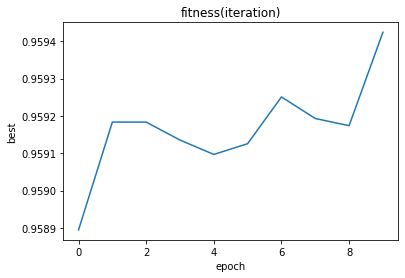

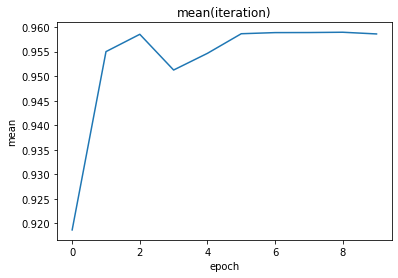

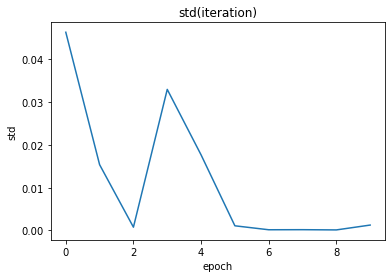

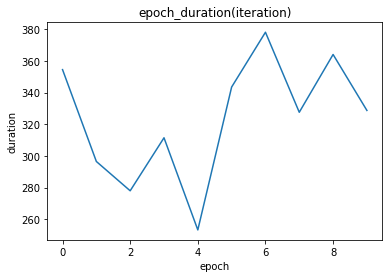

In [30]:
# scenario 0 (tournament, cxTwoPoint, with elitism):
selection={'function':tools.selTournament, 'tournsize':3} 
mate={'function':tools.cxTwoPoint}

parameters=parametersRFC
fitness=parametersFitnessRFC
mutation=mutationRFC
elitism = False
verbose = 7
run(fitness, parameters, mutation, selection , mate , elitism, verbose)

### II Selekcja cech

In [31]:
# Generationg new individual
import random
def parametersFeaturesRFC(numberFeatures,icls):
    genome = list()
    
    # n_estimators
    n_estimators = random.randint(20, 200)
    genome.append(n_estimators)
    
    # criterion
    criterion = ['gini', 'entropy']
    genome.append(criterion[random.randint(0, 1)])

    # max_depth
    max_depth = None
    if random.uniform(0,1) > 0.5: max_deph = random.randint(1, 20)
    genome.append(max_depth)
    
    # min_samples_split
    min_samples_split = 2
    if random.uniform(0,1) > 0.5: min_samples_split = random.randint(3, 10)
    genome.append(min_samples_split)
    
    # min_samples_leaf
    min_samples_leaf = 2
    if random.uniform(0,1) > 0.5: min_samples_leaf = random.randint(2, 10)
    genome.append(min_samples_leaf)
    
    # min_weight_fraction_leaf
    min_weight_fraction_leaf = 0.0
    if random.uniform(0,1) > 0.5: min_weight_fraction_leaf = random.uniform(0.0, 0.5)
    genome.append(min_weight_fraction_leaf)
    
    # max_features
    max_features = ['auto', 'sqrt', 'log2']
    genome.append(max_features[random.randint(0, 2)])
    
    # features
    for i in range(0,numberFeatures):
        genome.append(random.randint(0, 1))

    return icls(genome)

In [32]:
# Mutation
def mutationFeaturesRFC(individual):
    numberParamer= random.randint(0,len(individual)-1)
    if numberParamer==0:
        # n_estimators
        n_estimators = random.randint(20, 200)
        individual[numberParamer]=n_estimators
    elif numberParamer==1:    
        # criterion
        criterion = ['gini', 'entropy']
        individual[numberParamer]=criterion[random.randint(0, 1)]
    elif numberParamer==2: 
        # max_depth
        max_depth = None
        if random.uniform(0,1) > 0.2: max_deph = random.randint(1, 20)
        individual[numberParamer]=max_depth
    elif numberParamer==3: 
        # min_samples_split
        min_samples_split = 2
        if random.uniform(0,1) > 0.2: min_samples_split = random.randint(3, 10)
        individual[numberParamer]=min_samples_split
    elif numberParamer==4: 
        # min_samples_leaf
        min_samples_leaf = 2
        if random.uniform(0,1) > 0.2: min_samples_leaf = random.randint(2, 10)
        individual[numberParamer]=min_samples_leaf
    elif numberParamer==5: 
        # min_weight_fraction_leaf
        min_weight_fraction_leaf = 0.0
        if random.uniform(0,1) > 0.2: min_weight_fraction_leaf = random.uniform(0.0, 0.5)
        individual[numberParamer]=min_weight_fraction_leaf
    elif numberParamer==6: 
        # max_features
        max_features = ['auto', 'sqrt', 'log2']
        individual[numberParamer]=max_features[random.randint(0, 2)]
    else: #genetyczna selekcja cech
        if individual[numberParamer] == 0: 
            individual[numberParamer] = 1
        else:
            individual[numberParamer] = 0

In [33]:
# Fitness function
import math
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

def parametersFitnessFeaturesRFC(y,df,numberOfAtributtes,individual):
    split=5
    cv = StratifiedKFold(n_splits=split)
    
    listColumnsToDrop=[] #lista cech do usuniecia
    for i in range(numberOfAtributtes,len(individual)):
        if individual[i]==0: #gdy atrybut ma zero to usuwamy cechę
            listColumnsToDrop.append(i-numberOfAtributtes)

    dfSelectedFeatures=df.drop(df.columns[listColumnsToDrop], axis=1, inplace=False)
    
    mms = MinMaxScaler()
    df_norm = mms.fit_transform(dfSelectedFeatures)

    estimator = RandomForestClassifier(n_estimators=individual[0], criterion=individual[1], max_depth=individual[2], 
                                       min_samples_split=individual[3], min_samples_leaf=individual[4], 
                                       min_weight_fraction_leaf=individual[5], max_features=individual[6],
                                      n_jobs=-1)
    resultSum = 0
    for train, test in cv.split(df_norm, y):
        estimator.fit(df_norm[train], y[train])
        predicted = estimator.predict(df_norm[test])
        expected = y[test]
        tn, fp, fn, tp = metrics.confusion_matrix(expected, predicted).ravel()
        result = (tp + tn) / (tp + fp + tn + fn) #w oparciu o macierze pomyłek https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/
        resultSum = resultSum + result #zbieramy wyniki z poszczególnych etapów walidacji krzyżowej

    return resultSum / split,

toolbox
population init


C:\Users\dt\anaconda3\lib\site-packages\deap\creator.py:138: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
C:\Users\dt\anaconda3\lib\site-packages\deap\creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


optimization
generation:  0
-- Generation 1 --
  Min 0.8086214914888336
  Max 0.9581536949402076
  Avg 0.9201291915011396
  Std 0.04690610029890667
Best individual is [50, 'gini', None, 9, 2, 0.0, 'sqrt', 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1], (0.9581536949402076,)
generation:  1
-- Generation 2 --
  Min 0.9310710184059354
  Max 0.9591257408774461
  Avg 0.9535119051936232
  Std 0.007709245549206399
Best individual is [150, 'entropy', None, 8, 2, 0.0, 'sqrt', 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1], (0.9591257408774461,)
generation:  2
-- Generation 3 --
  Min 0.9525812452044116
  Max 0.9594722107477777
  Avg 0.9573024206469789
  Std 0.0018786328321629005
Best individual is [150, 'entropy', None, 8, 2, 0.0, 'sqrt', 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1], (0.9594722107477777,)
generation:  3
-- Generation 4 --
  Min 0.9573067493956755
  Max 0.9594144555029839
  Avg 0.9586849458853152
  Std 0.0006841

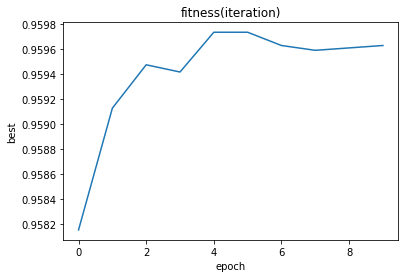

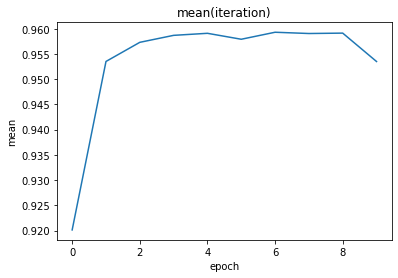

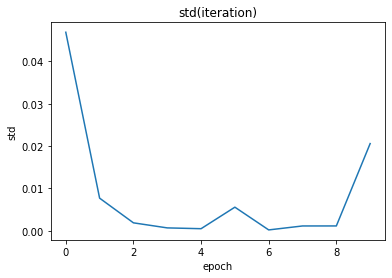

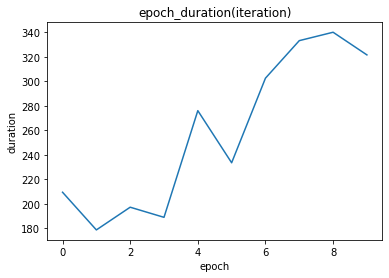

In [34]:
# scenario 0 (tournament, cxTwoPoint, with elitism, 100 epochs, 100 individuals in initpopulation):
selection={'function':tools.selTournament, 'tournsize':3} 
mate={'function':tools.cxTwoPoint}

parameters=parametersFeaturesRFC
fitness=parametersFitnessFeaturesRFC
mutation=mutationFeaturesRFC
elitism = False
verbose = 7
run(fitness, parameters, mutation, selection , mate , elitism, verbose)